In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import statistics
%matplotlib inline

In [4]:
df = pd.read_excel('Douban.xlsx')

In [5]:
pd.set_option('display.max_rows', 200)

## Deleting the movies not having rating and having voted users lower than 10,000

In [6]:
df_clean = df.drop_duplicates(subset='电影名')

In [7]:
delete = ['(尚未上映)', '(目前无 )', '(评价人数不足)']
df_clean = df_clean[~df_clean['评分'].isin(delete)]

In [8]:
df = df[df['评价人数']>10000]

In [9]:
response = requests.get('https://movie.douban.com/subject/1303773/')
doc = BeautifulSoup(response.text, "html.parser")

In [10]:
df = df.reset_index()

## Scraping IMDb link by using the Douban dataset

In [221]:
errors = []
def imdb_link(row):
    try:
        response = requests.get(row['链接'])
        doc = BeautifulSoup(response.text, "html.parser")
        for item in doc.find_all('span', attrs={'class': 'pl'}):
            if item.text == 'IMDb链接:':
                link = item.next_sibling.next_sibling['href']
                print('Succesful')
                return link
        return np.nan
    except:
        print('Error found on index',row.index)
        errors.append(row.电影名)

In [237]:
%%time
df['imdb_link'][11000:11002] = df[11000:11002].apply(imdb_link, axis=1)

Succesful
Succesful
CPU times: user 223 ms, sys: 128 ms, total: 351 ms
Wall time: 5.37 s


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [238]:
df[11000:11002]

,电影名,评分,评价人数,链接,时间,演员,imdb_link
11000,惊声尖叫,7,23963.0,https://movie.douban.com/subject/1301630/,1996-12-20 00:00:00,"['内芙·坎贝尔', '斯基特·乌尔里奇', '柯特妮·考克斯', '大卫·阿奎特', '德...",http://www.imdb.com/title/tt0117571
11001,惊声尖叫2,6.4,10564.0,https://movie.douban.com/subject/1299495/,1997-12-12 00:00:00,"['内芙·坎贝尔', '杰米·肯尼迪', '柯特妮·考克斯', '列维·施瑞博尔', '贾达...",http://www.imdb.com/title/tt0120082


In [182]:
df.shape

(17242, 7)

## Discovered lots of duplicates and removed tham by movie name

In [264]:
df.to_csv("Douban_imdblink.csv", index=False)

In [265]:
df2 = pd.read_csv('Douban_imdblink.csv')

In [266]:
df2 = df2.drop_duplicates(subset='电影名')

In [267]:
df2.shape

(4919, 7)

In [268]:
df2 = df2.reset_index()

In [269]:
errors = []
def imdb_link(row):
    try:
        response = requests.get(row['链接'])
        doc = BeautifulSoup(response.text, "html.parser")
        for item in doc.find_all('span', attrs={'class': 'pl'}):
            if item.text == 'IMDb链接:':
                link = item.next_sibling.next_sibling['href']
                print('Succesful')
                return link
        return np.nan
    except:
        print('Error found on index',row.index)
        errors.append(row.电影名)

In [270]:
%%time
df2['imdb_link'][4901:4918] = df[4901:4918].apply(imdb_link, axis=1)

Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
CPU times: user 1.9 s, sys: 134 ms, total: 2.03 s
Wall time: 51.8 s


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [272]:
df2.to_csv("Douban_imdblink_all.csv", index=False)

## Revoved the movies don't have imdb link on Douban page

In [12]:
df2 = pd.read_csv('Douban_imdblink_all.csv')

In [14]:
df2.shape

(4919, 8)

In [15]:
df2 = df2[df2['imdb_link'].notnull()]

In [16]:
df2.shape

(4710, 8)

In [499]:
# errors = []
# def count(row):
#     try:
#         response = requests.get(row['imdb_link'])
#         doc = BeautifulSoup(response.text, "html.parser")
#          name = doc.find_all('h1', attrs={'itemprop': 'name'})[0].text
#          rating = doc.find_all('span', attrs={'itemprop': 'ratingValue'})[0].text
#         count = doc.find_all('span', attrs={'itemprop': 'ratingCount'})[0].text
#       genres = doc.find_all('span', attrs={'itemprop': 'genre'})
#         print('Succesful')
#         return count
#     except:
#         print('Error found on',row.电影名)
#         errors.append(row.电影名)

In [513]:
# errors = []
# def count(row):
#     try:
#         response = requests.get(row.imdb_link)
#         doc = BeautifulSoup(response.text, "html.parser")
#         ratingCount = doc.find('span', attrs={'itemprop': 'ratingCount'}).text
#         print('Succesful')
#         return ratingCount
#     except:
#         print('Error found on index',row.电影名)
#         errors.append(row.电影名)

In [517]:
%%time
df2['ratingCount'] = df2.apply(count, axis=1)

Succesful
Error found on index 007之明日帝国
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful


Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Error found on index 双面胶
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succe

Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Error found on index 少年包青天Ⅱ
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Su

Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Error found on index 极限挑战第一季
Succesful
Succesful
Succesful
Succesful
S

Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful


Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful
Succesful


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
errors = []
def info(row):
    try:
        response = requests.get(row.imdb_link)
        doc = BeautifulSoup(response.text, "html.parser")
        name = doc.find('h1', attrs={'itemprop': 'name'}).text
        rating = doc.find('span', attrs={'itemprop': 'ratingValue'}).text
        ratingCount = doc.find('span', attrs={'itemprop': 'ratingCount'}).text
        genres_raw = doc.find_all('span', attrs={'itemprop': 'genre'})
        genres = []
        for genre in genres_raw:
            genres.append(genre.text)
        print(row['index'])
        return pd.Series({'name': name, 'rating': rating, 'ratingCount': ratingCount, 'genres': ' '.join(genres)})
    except:
        print('Error found on index',row.电影名)
        errors.append(row.电影名)

In [46]:
%%time
#df2[0:10].apply(info, axis=1).join(df2)
df3 = df2.apply(info, axis=1).join(df2)

0
0
1
2
3
4
5
6
7
8
9
10
11
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
117
118
119
120
121
122
123
126
127
128
129
130
131
132
133
134
135
136
138
139
Error found on index 一起来看流星雨
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
180
181
182
183
184
185
187
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
212
213
214
215
216
217
218
219
220
221
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
254
255
256
257
258
260
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
279
280
281
282
283
284
285
286
289
290
291


1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1907
1908
1909
1910
1911
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2037
2038
2039
2040
2041
2042


3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
Error found on index 紧急救命2
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
Error found on index 红色
3554
3555
3557
3558
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3679
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694

In [47]:
df3.to_csv("douban_imdb.csv", index=False)

## Story 1: The movies that are both popular on Douban and IMDb (>10000 comments), what are the biggest difference?
## (1) the biggest difference movie; (2) the worst movie; (3) the best movie

In [3]:
df3 = pd.read_csv('douban_imdb.csv')

In [4]:
df3['ratingCount'] = df3['ratingCount'].str.replace(r',', '')

In [5]:
df3 = df3[df3['ratingCount'].notnull()]

In [6]:
df3.shape

(4677, 12)

In [7]:
df3 = df3[df3['ratingCount'].astype(int) > 10000]

In [8]:
df3.shape

(2345, 12)

In [9]:
df3['name'] = df3['name'].str.replace(r'(\(\d\d\d\d)\)', '')

In [10]:
df3['rating'] = df3['rating'].astype(float)

In [11]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


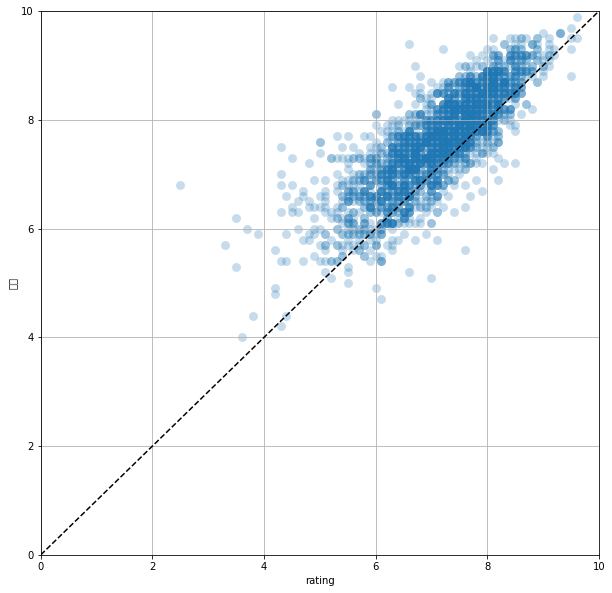

In [26]:
ax = df3.plot(x='rating', 
        y='评分', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

#plt.savefig('global_popular.pdf')

In [13]:
df3[df3['rating'] < 4].head(1) #小鬼当家4

,genres,name,rating,ratingCount,index,电影名,评分,评价人数,链接,时间,演员,imdb_link
1628,Comedy Crime Family,Home Alone 4,2.5,25982,1688,小鬼当家4,6.8,10518.0,https://movie.douban.com/subject/1422925/,2002-11-03(美国),"['弗伦奇·斯图尔特', '杰森·贝吉', '克拉儿·凯瑞', '艾瑞克·阿瓦利', '美国']",http://www.imdb.com/title/tt0329200


In [14]:
df3[df3['rating'] < 4].tail(1) #龙之战

,genres,name,rating,ratingCount,index,电影名,评分,评价人数,链接,时间,演员,imdb_link
4609,Action Drama Fantasy,Dragon Wars: D-War,3.6,21968,4809,龙之战,4.0,13247.0,https://movie.douban.com/subject/2009342/,2007-08-01(韩国),"['2008-05-13(中国大陆)', '杰森·贝尔', '阿曼达·布鲁克斯', '罗伯特...",http://www.imdb.com/title/tt0372873


In [15]:
df3[df3['rating'] > 9.5] #地球脉动第二季

,genres,name,rating,ratingCount,index,电影名,评分,评价人数,链接,时间,演员,imdb_link
1127,Documentary,Planet Earth II,9.6,32623,1169,地球脉动第二季,9.9,12365.0,https://movie.douban.com/subject/26733371/,2016-11-06(英国),"['戴维·阿滕伯勒', '英国', 'www.bbc.co.uk/programmes/p0...",http://www.imdb.com/title/tt5491994
3259,Crime Drama Mystery,A Scandal in Belgravia,9.6,28192,3391,神探夏洛克第二季,9.5,173320.0,https://movie.douban.com/subject/6522269/,2012-01-01(英国),"['本尼迪克特·康伯巴奇', '马丁·弗瑞曼', '鲁珀特·格雷夫斯', '安德鲁·斯科特'...",http://www.imdb.com/title/tt1942612


In [205]:
df3[df3['genres'] == 'Action']

,genres,name,rating,ratingCount,index,电影名,评分,评价人数,链接,时间,演员,imdb_link,percent
3819,Action,Batman Returns,7.0,229448,3978,蝙蝠侠归来,7.1,19566.0,https://movie.douban.com/subject/1294929/,1992-06-19(美国),"['迈克尔·基顿', '丹尼·德维托', '米歇尔·菲佛', '克里斯托弗·沃肯', '迈克...",http://www.imdb.com/title/tt0103776,top 25%


In [114]:
import pylab as pl
import random 

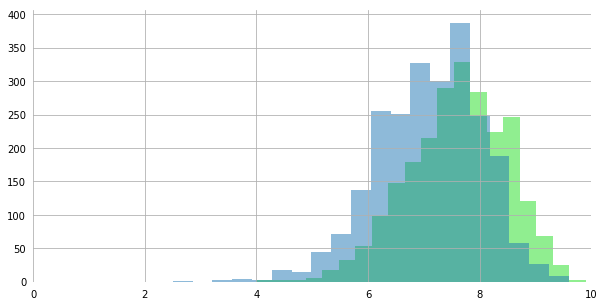

In [206]:
ax = df3['评分'].hist(figsize=(10,5), color='lightgreen', bins=20)
df3['rating'].hist(ax=ax, alpha=0.5, bins=20)
#ax.grid('off')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xlim([0, 10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('distribution_ratings.pdf')

In [168]:
a = df3['genres'].value_counts().to_frame()

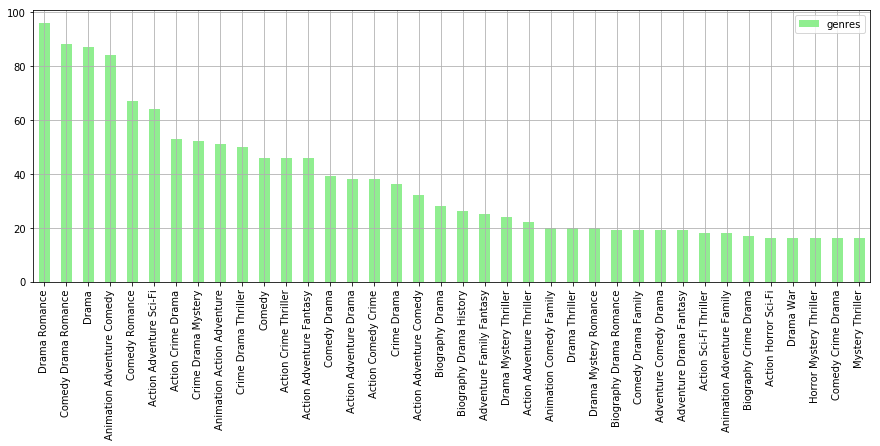

In [186]:
ax = a[a['genres'] > 15].plot(kind='bar', figsize=(15,5), color='lightgreen')
ax.grid('on')

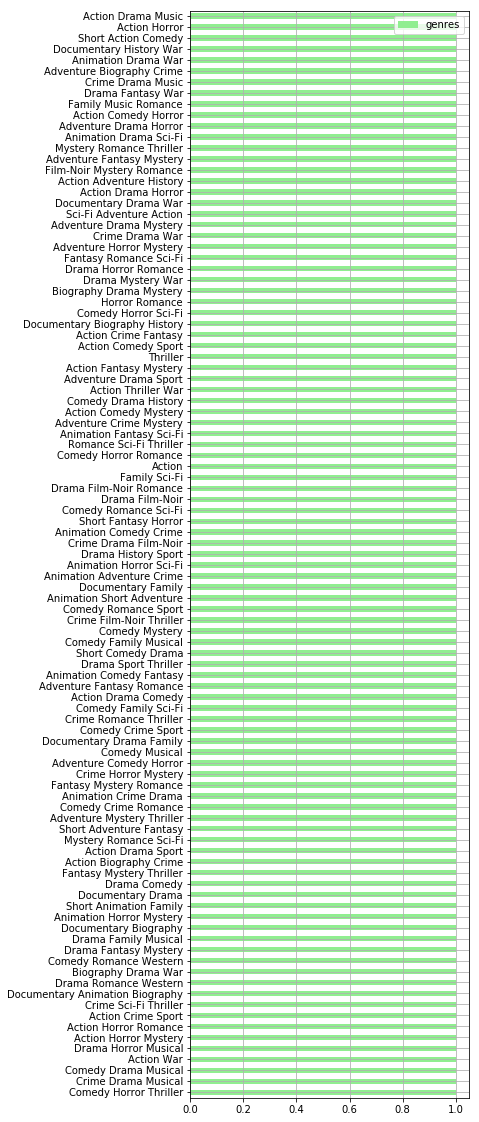

In [196]:
ax = a[a['genres'] == 1].plot(kind='barh', figsize=(5,20), color='lightgreen')
ax.grid('on')

In [192]:
a[a['genres'] == 1].count()

genres    99
dtype: int64

## df4 is the database of which the column 'count' is not filtered by 10,000

In [3]:
df4 = pd.read_csv("douban_imdb.csv")

In [4]:
df4['ratingCount'] = df4['ratingCount'].str.replace(r',', '')

In [5]:
df4 = df4[df4['ratingCount'].notnull()]

In [6]:
df4['name'] = df4['name'].str.replace(r'(\(\d\d\d\d)\)', '')

In [7]:
df4['rating'] = df4['rating'].astype(float)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


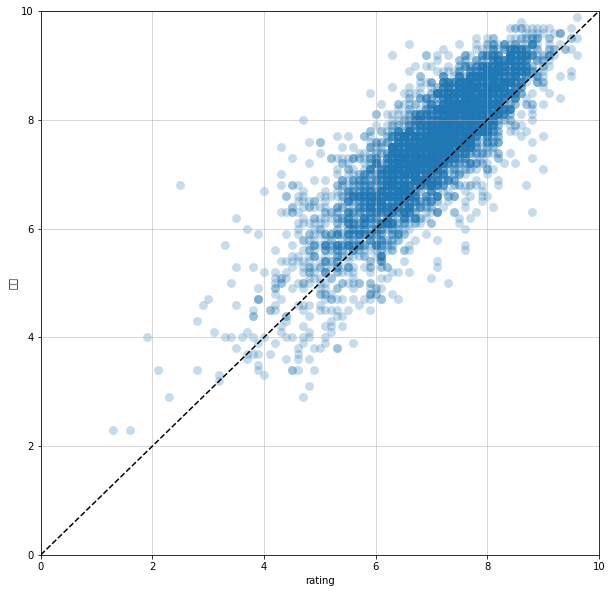

In [8]:
ax = df4.plot(x='rating', 
        y='评分', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid(linewidth=0.5)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

#plt.savefig('boring_graph.pdf')

## df5 is the database of which the column 'count' is filtered by 5,000
## Story 2: The movies that really popular on Douban (>10000 comments) but has less than 10 commnets on IMDb

In [9]:
df5 = df4[df4['ratingCount'].astype(int) < 10 ]

In [10]:
df5.shape

(30, 12)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


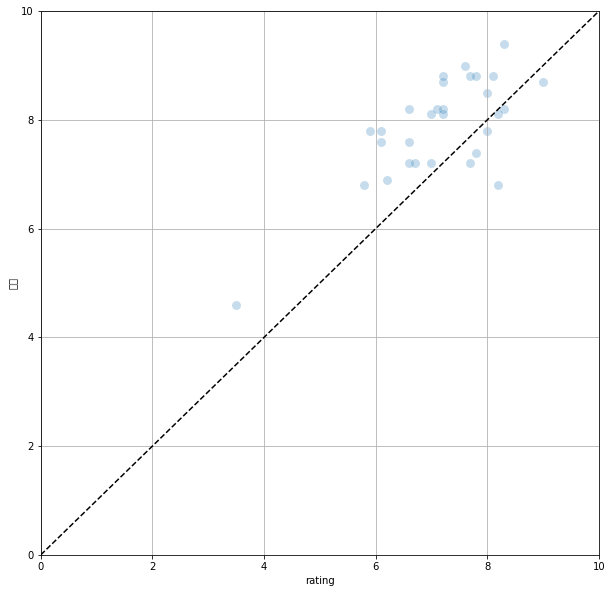

In [13]:
ax = df5.plot(x='rating', 
        y='评分', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

plt.savefig('only_popular_in_asia.pdf')

In [14]:
df5[df5['评分'] > 8.5] #夏目友人帐第三季

,genres,name,rating,ratingCount,index,电影名,评分,评价人数,链接,时间,演员,imdb_link
220,Animation,A Good Beginning Makes a Good Ending. ...,9.0,5,235,世界第一初恋2,8.7,12986.0,https://movie.douban.com/subject/6755898/,2011-10-07(日本),"['近藤隆', '小西克幸', '立花慎之介', '中村悠一', '冈本信彦']",http://www.imdb.com/title/tt5112710
353,War,Ren Jian Zheng Dao Shi Cang Sang,7.8,6,378,人间正道是沧桑,8.8,13167.0,https://movie.douban.com/subject/3153641/,2009-06-02(中国大陆),"['孙红雷', '黄志忠', '吕中', '孙淳', '张恒 ']",http://www.imdb.com/title/tt4054338
1057,Animation Comedy Drama,Kumonosu,7.6,7,1099,四月一日灵异事件簿2,9.0,11082.0,https://movie.douban.com/subject/3034986/,2008-04-03(日本),"['大原沙耶香', '福山润', '中井和哉', '伊藤静', '菊地美香']",http://www.imdb.com/title/tt1218007
1179,Animation Comedy Drama,Ayashiki mono no na,8.3,9,1222,夏目友人帐第三季,9.4,36077.0,https://movie.douban.com/subject/5967223/,2011-07-04(日本),"['神谷浩史', '井上和彦', '小林沙苗', '石田彰', '堀江一真']",http://www.imdb.com/title/tt2722534
2664,Animation Short,Mei tou nao he bu gao xing,7.2,5,2778,没头脑和不高兴,8.7,49324.0,https://movie.douban.com/subject/1428578/,中国大陆,"['张松林', '20分钟', '喜剧', '动画', '短片']",http://www.imdb.com/title/tt6825352
2763,Drama,Menchikatsu,7.7,9,2881,深夜食堂3,8.8,16437.0,https://movie.douban.com/subject/25958786/,2014-10-19(日本),"['小林薰', '绫田俊树', '不破万作', '松重丰', '光石研']",http://www.imdb.com/title/tt4140788
2923,Drama,Fu mu ai qing,7.2,6,3048,父母爱情,8.8,11860.0,https://movie.douban.com/subject/19965220/,2014-02-02(中国大陆),"['郭涛', '梅婷', '王菁华', '郭广平', '张延']",http://www.imdb.com/title/tt4168486
3662,Adventure Drama,Wu yue chuan qi,8.1,7,3812,舞乐传奇,8.8,14125.0,https://movie.douban.com/subject/21759697/,2013-12-31(中国大陆),"['秋瓷炫', '林更新', '高一玮', '胡海峰', '苏茜薇']",http://www.imdb.com/title/tt4307098


/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


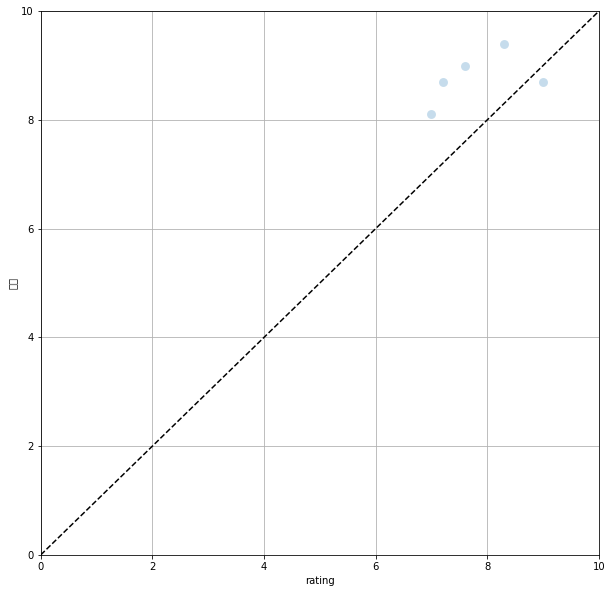

In [20]:
ax = df5[df5['genres'].str.contains('Animation')].plot(x='rating', 
        y='评分', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

plt.savefig('only_popular_in_asia.pdf')

In [19]:
df5

,genres,name,rating,ratingCount,index,电影名,评分,评价人数,链接,时间,演员,imdb_link
107,Comedy,Yi pu er zhu,6.6,8,110,一仆二主,7.2,11089.0,https://movie.douban.com/subject/25188219/,2014-03-19(中国大陆),"['张嘉译', '闫妮', '江疏影', '尤勇', '姬他']",http://www.imdb.com/title/tt4771520
216,Mystery,Yonimo kimyô na monogatari: '13 haru no tokube...,6.1,8,231,世界奇妙物语2013年春之特别篇,7.6,10020.0,https://movie.douban.com/subject/24321138/,2013-05-11(日本),"['小栗旬', '相岛一之', '原干惠', '檀丽', '尾美利德']",http://www.imdb.com/title/tt2891888
220,Animation,A Good Beginning Makes a Good Ending. ...,9.0,5,235,世界第一初恋2,8.7,12986.0,https://movie.douban.com/subject/6755898/,2011-10-07(日本),"['近藤隆', '小西克幸', '立花慎之介', '中村悠一', '冈本信彦']",http://www.imdb.com/title/tt5112710
353,War,Ren Jian Zheng Dao Shi Cang Sang,7.8,6,378,人间正道是沧桑,8.8,13167.0,https://movie.douban.com/subject/3153641/,2009-06-02(中国大陆),"['孙红雷', '黄志忠', '吕中', '孙淳', '张恒 ']",http://www.imdb.com/title/tt4054338
357,Drama,Miss Mermaid: Ineo Agassi,5.9,9,382,人鱼小姐,7.8,15592.0,https://movie.douban.com/subject/2032605/,2002-06-24(韩国),"['张瑞希', '金成珉', '禹喜珍', '郑宝石', '李在恩']",http://www.imdb.com/title/tt4684808
410,Crime,Yu Zui,7.1,9,437,余罪第一季,8.2,58110.0,https://movie.douban.com/subject/26363830/,2016-05-23(中国大陆),"['张一山', '吴优', '常戎', '张锦程', '王戈']",http://www.imdb.com/title/tt5925192
1057,Animation Comedy Drama,Kumonosu,7.6,7,1099,四月一日灵异事件簿2,9.0,11082.0,https://movie.douban.com/subject/3034986/,2008-04-03(日本),"['大原沙耶香', '福山润', '中井和哉', '伊藤静', '菊地美香']",http://www.imdb.com/title/tt1218007
1179,Animation Comedy Drama,Ayashiki mono no na,8.3,9,1222,夏目友人帐第三季,9.4,36077.0,https://movie.douban.com/subject/5967223/,2011-07-04(日本),"['神谷浩史', '井上和彦', '小林沙苗', '石田彰', '堀江一真']",http://www.imdb.com/title/tt2722534
1243,Animation Adventure Comedy,Little Mouse on the Prairie,7.0,5,1291,大草原上的小老鼠,8.1,22633.0,https://movie.douban.com/subject/2136181/,美国,"['中国大陆', '王力平', '王强', '庄正斌', '广定宪']",http://www.imdb.com/title/tt4792478
1290,Fantasy Romance,Tian wai fei xian,7.7,7,1339,天外飞仙,7.2,12885.0,https://movie.douban.com/subject/2303259/,2006-08-04(中国大陆),"['胡歌', '林依晨', '李勤勤', '赵亮', '谢君豪']",http://www.imdb.com/title/tt5870402
